# The Dragon Academy 2019 - 2020  


# G12 Mathematics of Data Management


## Term 1 Test 1



# NAME:

![Table 1](G12-MDM-Term1-T1.png)

## 1 (KtiCa) For the table of values above, calculate the folowing statistics for both 'x' and 'y'

1. All central tendency measure you know of
2. All spread measures you know of
3. Percentiles 30 and 60 for each set



## 2 (KticA) Compare both set of values 'x' and 'y' and answer these questions  

1. Do both sets have similar spread or is it much larger for one than for the other? Justify your answer by providing the appropriate calculations
2. Compare the values for lines numbered 3, 5 and 7. For each case, say which of both values 'x' or 'y' is farther away from its mean. Justify your answer with the appropriate calculations.


## 3 (ktiCA) For the table above, calculate the following  

1. Boxplot for both sets. Are there any outliers
2. Sketch a  histogram by grouping the values in 5 bins of equal size.

# Answers

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

fn='https://evermeet.cx/~user055/Dragon/Lessons/G12MDM/AutomobileDataEDA.csv'

df = pd.read_csv(fn)
df.head(10)           #let's show the data on the first 10 cars of the list
'''
'''


'\n'

In [77]:
tb=df[['price','city-mpg']].head(10)
tb.columns=['x','y']
tb.loc[4,'x']=57398
xs=tb.sort_values(by='x')
ys=tb.sort_values(by='y')
print(xs['x'].values[2]-(xs['x'].values[2]-xs['x'].values[3])/2 )
xs

15840.0


x   y
0  13495.0  21
3  13950.0  24
5  15250.0  19
9  16430.0  23
1  16500.0  21
2  16500.0  19
6  17710.0  19
7  18920.0  19
8  23875.0  17
4  57398.0  18

In [6]:
x=tb['x'].values
y=tb['y'].values
tb.describe()

x          y
count     10.00000  10.000000
mean   21002.80000  20.000000
std    13117.86473   2.211083
min    13495.00000  17.000000
25%    15545.00000  19.000000
50%    16500.00000  19.000000
75%    18617.50000  21.000000
max    57398.00000  24.000000

In [13]:
np.median(x),np.median(y)

(16500.0, 19.0)

In [15]:
np.quantile(x,0.3),np.quantile(x,0.6)

(16076.0, 16984.0)

In [16]:
np.quantile(y,0.3),np.quantile(y,0.6)

(19.0, 19.799999999999997)

In [40]:
stx=np.sqrt(np.var(x))
sty=np.sqrt(np.var(y))
print(stx,sty)

12444.699175150838 2.0976176963403033


In [42]:
xm = np.mean(x)
ym = np.mean(y)
print(xm,ym)

21002.8 20.0


In [43]:
print("Rel.spread x:",stx/xm)
print("Rel.spread y:",sty/ym)

Rel.spread x: 0.5925257191970041
Rel.spread y: 0.10488088481701516


## The histogram and its skewness

Let's look at the histograms of $x$ and $y$

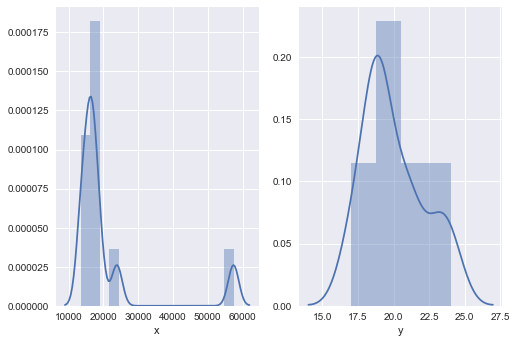

In [73]:
import seaborn as sns

ax1=plt.subplot(121)
axx=sns.distplot(x,hist=True,axlabel='x',ax=ax1)
ax2=plt.subplot(122)
axy=sns.distplot(y,hist=True,axlabel='y',ax=ax2)

We can easily see that neither of those two histograms are symmetric around one single peak. Also, they show a tail towards the right (its more clear for the case of $x$). We say the histograms are _skewed_. 

**How can we measured that skewness**

Consider for a moment the histogram for x. Having a long tail means that many values are "small" but a few are much larger than the mean. 

If the histogram were symmetric, for each value of $x$ at a give distance above its mean, one would get another value below the mean but at the same distance from it. 

Hence, in order to quantify that skewnes, we may want to look at the differences wrt the mean.

Let's consider the differences $x-\overline{x}$. What is its average? What about for $y$?


In [86]:
xdif = xs[['x']].copy(deep=True)
xdif['$x-\overline x$']=x-x.mean()
print('Mean x:',x.mean())
xdif

Mean x: 21002.8


x  $x-\overline x$
0  13495.0          -7507.8
3  13950.0          -4502.8
5  15250.0          -4502.8
9  16430.0          -7052.8
1  16500.0          36395.2
2  16500.0          -5752.8
6  17710.0          -3292.8
7  18920.0          -2082.8
8  23875.0           2872.2
4  57398.0          -4572.8

In [87]:
xdif['$x-\overline x$'].mean()

3.637978807091713e-13

We see that the average value of $x-\overline{x}$ is less than 4 divided by 10 trillion! In Computer Science lingo, this is the same as saying it's zero!! You can easily convince yourself that the same happens for $y$.

What about the following values $\left(x-\overline{x}\right)^2$ ? These are no longer zero -they will never be zero unless your measurements always get one and the same result!

In particular we get an average of this difference squared of $154870537.56$ and $4.4$, for $x$ and $y$ respectively.

In [89]:
meanOfDifferencesSquared_x=((x-x.mean() )**2 ).mean()
meanOfDifferencesSquared_y=((y-y.mean() )**2 ).mean()
meanOfDifferencesSquared_x,meanOfDifferencesSquared_y

(154870537.55999994, 4.4)

However, as we are squaring the differences, we cannot distinguish between a value below the mean and one above the mean: *when squaring we loose the sign of that difference*. This means this quantity **cannot capture our intuition of skewness either**.

Let's then look at the differences to the $3$rd power, $\left(x-\overline{x}\right)^3$.

As we know from math, the odd power of a negative number is also negative. Example: $(-3)^3=-27$, but $(-3)^4=+81$!

This time, then, we won't loose the information of the sign of these differences, in other words, **these differences are able to capture the left or right bias of the data**!

As the mean of a set of numbers is always *very sensitive to extreme values and outliers*, these differences will be dominated by the tail of the histogram. This means, **if the tail is towards the right, the skewness will be positive, and if the tail is towards the left, the skewness will be negative**.

#### Example
Let's consider a simple example. Consider the list of four numbers $a=[0,1,2,3]$. Clearly, the mean is $1.5$ and for each value below this mean there is another above it at the same distance. Hence the skewnness will be zero. **Check it by calculating it yourself!**

Let's now swap that $0$ by a $10,\,100,\,1000$ and check in each case what happens with the skewness. 

In [123]:
print("Positive Skewness:\nOutlier\tMean\tMean((x-<x>)^3)\tskewness (standard; see text below)")
for l in [0,10, 100,1000]:
    a = np.array([l,1,2,3])
    print(str(l)+":\t",a.mean(),"\t",((a-a.mean())**3).mean(),"\t\t",stats.skew(a))

Positive Skewness:
Outlier	Mean	Mean((x-<x>)^3)	skewness (standard; see text below)
0:	 1.5 	 0.0 		 0.0
10:	 4.0 	 45.0 		 1.0182337649086284
100:	 26.5 	 88200.0 		 1.1537390557978817
1000:	 251.5 	 93188250.0 		 1.154691263747523


Let's repeat the experiment with value of $0,\,-10,\,-100,\,-1000$.

In [124]:
print("Negative skewness:\nOutlier\tMean\tMean((x-<x>)^3)\tskewness (standard; see text below)")
for l in [0,-10, -100,-1000]:
    a = np.array([l,1,2,3])
    print(str(l)+":\t",a.mean(),"\t",((a-a.mean())**3).mean(),"\t\t",stats.skew(a))

Negative skewness:
Outlier	Mean	Mean((x-<x>)^3)	skewness (standard; see text below)
0:	 1.5 	 0.0 		 0.0
-10:	 -1.0 	 -157.5 		 -1.092148056772224
-100:	 -23.5 	 -99450.0 		 -1.1538129615124053
-1000:	 -248.5 	 -94313250.0 		 -1.154691337648407


Let's see now what we get for our datasets $x$ and $y$.

#### Skewness unscaled

In [39]:
((y-y.mean() )**3 ).mean()

5.4

In [40]:
((x-x.mean() )**3 ).mean()

4694581371666.743

Wow! The mean value of those differences cubed is astronomically higher for $x$ than for $y$. **However, this doesn't correspond to what we _see when looking at their histograms_**!!

Something is odd about using just the differences cubed.

It turns out that the result for $x$ is that much higher because the scale of the values of $x$ is about $2000$ times that of $y$. And $8000^3=8\cdot 10^6$, i.e., when cubing the result becomes $8$ million times larger! Yet, this back of the envelop calculation doesn't completely explain the even larger difference we got for both datasets. Why?

What really matters in this calculation are not the values themselves, but the scale of their differences with respect to the mean. For $y$ the largest differences is $4$, while for $x$ is about $40000$. **That is, the scale difference that really matters is $10000=10^4$. When cubing this we get $10^12$, a trillion times larger for $x$ than for $y$ and our calculations show**!!

We need thus a way to properly compare this values without being affected by the intrinsic scale of each data set.!

One way is by dividing those differences by their mean.

#### Skewness scaling by the mean

In [31]:
((y-y.mean() )**3 ).mean()/y.mean()**3

0.000675

In [125]:
((x-x.mean() )**3 ).mean()/x.mean()**3

0.5067167735408883

When dividing those differences by the mean we obtain values easier to grasp. Yet, the result for $x$ is still $1000$ times that for $y$!

This is still not quite what we would have expected, isn't?

Look again at the histograms. Both show a right bias, sure. But would you say that of $x$ is thousand times larger than that of $y$!? Clearly, no!

The reason for such unintuitive disparity of skewness values is that we are comparing the differences against the wrong number: Instead of comparing against the mean value, **we should compared against the mean difference with respect to the mean!**

But we have seen above that the mean difference with respect to the mean is always zero!

Hence, we need to compare against the standard deviation!

#### Skewness scaling by the standard deviation

In [37]:
((y-y.mean() )**3 ).mean()/y.std()**3

0.585079316127977

In [38]:
stats.skew(x)

2.43581142085585

This now feels like something we could agree upon: the bias in $x$ is 4 times that of $y$.

This is the definition of the skewness we will be using from now on. In case of doubt we will called it the *standar skewness*.